In [2]:
#### Implementation of ANN with SGD and Backprop
#### original OOP implementation can be found at: https://medium.com/binaryandmore/beginners-guide-to-deriving-and-implementing-backpropagation-e3c1a5a1e536
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
## layer:
## take input X: (Nx1)
## multiply by weights W: (h1xN)
## add bias b: (h1x1)
def layer(X, W, b): return np.dot(W, X) + b

In [4]:
## lets take the activation as sigmoid (element-wise)
def sigmoid(x): return 1 / (1 + np.exp(-x))

In [5]:
## lets define the derivative of the sigmoid
def sigmoid_prime(x): return sigmoid(x)*(1.0 - sigmoid(x))

In [6]:
## define the mse cost per sample
def mse(y_pred, y_true): return (1 / 2) * np.square(y_pred - y_true)

In [7]:
## derivative of mse
def mse_prime(y_pred, y_true): return (y_pred - y_true)

In [8]:
## NN parameters
N = 50 #input size
num_nes = [N, 40, 30, 20, 10]
num_layers = len(num_nes) - 1
learning_rate = 0.01
num_epochs = 1000
num_data_samples = 100

## dict to hold neuron input-output pairs
layer_in_out_dict = dict()
## dict to hold the cost derivatives w.r.t to the params
layer_derivative_dict = dict()

In [9]:
## the dict to hold the layer weights and biases
weight_dict = {'w'+str(i): np.random.normal(size=(num_nes[i+1], num_nes[i])) for i in range(num_layers)}
bias_dict = {'b'+str(i): np.random.normal(size=(num_nes[i+1], 1)) for i in range(num_layers)}

In [10]:
def NN(inputs):
    a = inputs
    layer_in_out_dict['a0'] = a
    ## forward pass
    for i in range(num_layers):
        #print(i)
        z = layer(a, weight_dict['w'+str(i)], bias_dict['b'+str(i)])
        a = sigmoid(z)
        layer_in_out_dict['z'+str(i)] = z
        layer_in_out_dict['a'+str(i+1)] = a
    out = a
    return out

In [11]:
## Test the NN with a dummy forward pass
inp = np.random.uniform(0, 1, size=(N,1)) * 255.0
out_true = np.random.uniform(0, 1, size=(num_nes[-1], 1))
out = NN(inp)
error = mse(out, out_true)
print(np.mean(error))

0.11920851217449469


/var/folders/ty/pxb5sqj175xg9rl8xpmdxlkc0000gn/T/ipykernel_37348/2668785541.py:2: RuntimeWarning: overflow encountered in exp
  def sigmoid(x): return 1 / (1 + np.exp(-x))


In [12]:
## Function to perform model prediction
def predict(inputs): return NN(inputs)

In [13]:
def compute_grads(inputs, targets):
    ## perform a forward pass (prediction)
    out = predict(inputs)
    ## Compute dC/dzL, dC/dwL and dC/dbL
    ## first dC/dzL = (a - y) * a * (1 - a)
    layer_derivative_dict['dz'+str(num_layers-1)] = mse_prime(out, targets) * out * (1 - out)
    ## second compute the dC/dwL = dC/dzL * dzL/dwL
    #print(layer_derivative_dict['dz'+str(num_layers-1)].shape)
    #print(layer_in_out_dict['a'+str(num_layers-1)].shape)
    layer_derivative_dict['dw'+str(num_layers-1)] = np.dot(layer_derivative_dict['dz'+str(num_layers-1)], \
                                                    np.transpose(layer_in_out_dict['a'+str(num_layers-1)]))
    ## third calculate the dC/dbL = dC/dzL * dzL/dbL
    layer_derivative_dict['db'+str(num_layers-1)] = layer_derivative_dict['dz'+str(num_layers-1)] * 1
    
    ## Now since we have the derivatives at the output layer, we can calculate the derivatives for the rest of the 
    ## layers
    for i in reversed(range(num_layers-1)):
        #print(i)
        ## first compute dC/dzl = [w(l+1)*dC/dz(l+1)]*sigmoid_prime(zl)
        layer_derivative_dict['dz'+str(i)] = np.dot(
                                                np.transpose(weight_dict['w'+str(i+1)]), layer_derivative_dict['dz'+str(i+1)]) \
                                                * sigmoid_prime(layer_in_out_dict['z'+str(i)])
        ## second compute dC/dwl = dC/dzl * dzl/dwl
        layer_derivative_dict['dw'+str(i)] = layer_derivative_dict['dz'+str(i)] * \
                                                    np.transpose(layer_in_out_dict['a'+str(i)])
        
        ## third compute dC/dbl = dC/dzl * dzl/dbl
        layer_derivative_dict['db'+str(i)] = layer_derivative_dict['dz'+str(i)] * 1

In [14]:
## test the gradient computation 
compute_grads(inp, out_true)
#print(layer_derivative_dict)

/var/folders/ty/pxb5sqj175xg9rl8xpmdxlkc0000gn/T/ipykernel_37348/2668785541.py:2: RuntimeWarning: overflow encountered in exp
  def sigmoid(x): return 1 / (1 + np.exp(-x))


In [15]:
def update_param():
    for i in range(num_layers):
        weight_dict['w'+str(i)] = weight_dict['w'+str(i)] - learning_rate * layer_derivative_dict['dw'+str(i)]
        bias_dict['b'+str(i)] = bias_dict['b'+str(i)] - learning_rate * layer_derivative_dict['db'+str(i)]

In [16]:
## test param update function
update_param()

In [17]:
## make a dummy training dataset
inp_data = np.random.normal(size=(num_data_samples, num_nes[0]))
out_true_data = np.random.normal(size=(num_data_samples, num_nes[-1]))
#print(training_data)

In [18]:
mean_epoch_error_list = list()
for e in range(num_epochs):
    epoch_loss_list = list()
    for i in range(num_data_samples):
        inp = np.expand_dims(inp_data[i], 1)
        out_true = np.expand_dims(out_true_data[i], 1)
        #print(inp.shape)
        compute_grads(inp, out_true)
        update_param()
        out = predict(inp)
        error = np.mean(mse(out, out_true))
        epoch_loss_list.append(error)
    mean_epoch_error = np.mean(np.array(epoch_loss_list))
    mean_epoch_error_list.append(mean_epoch_error)
    print("Epoch loss: {}".format(mean_epoch_error))

Epoch loss: 0.5917002996873171
Epoch loss: 0.5519143856719242
Epoch loss: 0.5246789448715947
Epoch loss: 0.5136013997693294
Epoch loss: 0.5088261533541005
Epoch loss: 0.5062083544199996
Epoch loss: 0.5045177968886015
Epoch loss: 0.5032897363412442
Epoch loss: 0.5023161093918734
Epoch loss: 0.5014927602504633
Epoch loss: 0.5007630071249259
Epoch loss: 0.5000939020715546
Epoch loss: 0.49946525614803405
Epoch loss: 0.4988641683518793
Epoch loss: 0.4982821162358633
Epoch loss: 0.49771331683757153
Epoch loss: 0.4971537555830451
Epoch loss: 0.4966005885798316
Epoch loss: 0.4960517676774778
Epoch loss: 0.4955058067081508
Epoch loss: 0.4949616408040526
Epoch loss: 0.4944185471011327
Epoch loss: 0.49387610326642917
Epoch loss: 0.4933341644216921
Epoch loss: 0.4927928417970167
Epoch loss: 0.492252470003221
Epoch loss: 0.4917135556929674
Epoch loss: 0.4911767085055528
Epoch loss: 0.49064256332293893
Epoch loss: 0.49011170762939593
Epoch loss: 0.489584626941056
Epoch loss: 0.48906167551550966
Epoc

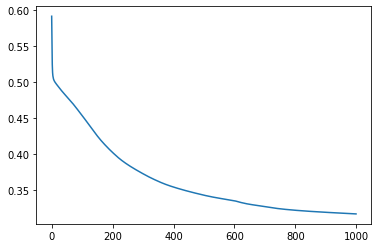

In [19]:
## Plot the model performance
plt.plot(np.arange(0, num_epochs, 1), mean_epoch_error_list)

### load mnist data using
#### mnist = tf.keras.datasets.mnist

### Define the following hyper parameters
#### Parameters to make a new neural network with the correct input and output sizes
#### Learning rate
#### number of layers
#### number of epochs
#### Refer to cell (8)

#### Reuse the layer dictionaries, weight dictionary and bias dictionary in cells (8) and (9)

### If necessary, write a function to onehot encode the scalar labels

### Define a function to calculate the accuracy (Use a threshold value to determine the sigmoid firing at the output layer when calculating the accuracy (This is because of the sigmoid function, If we use softmax, the logits are normalised so taking the maximum of the activation gives the predicted class))

### Train the neural network and plot the following (Extend the cell (18) accordingly)
#### For validation directly use the test set
#### Mean train error per epoch (Plot for all the epochs)
#### Mean validation error per epoch (Plot for all the epochs)
#### Mean train accuracy per epoch (Plot for all the epochs)
#### Mean validation accuracy per epoch (Plot for all the epochs)